In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor


Cell below presents reading the data from the same directory where the notebook is running. I previously uploaded this data from local machine to this directory for ease of upload. 

In [3]:
#Reading data into Pandas
df = pd.read_csv("SeoulBikeData.csv", encoding='ISO-8859-1')
df


,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


This cell below explores the datasets
- provides descriptive statistics such as Mean, IQR, range, min, max for numerical values
- The unique values and their distributions for categorical variables
- checking overall dimension of dataset.

In [4]:
#Exploring the Dataset 


#Dimensions of dataset(Entries and Columns)
print("The number of rows (entries) are", df.shape[0], "and the number of original features are", df.shape[1]-1)
print('\n')

#Exploring the unique values and counts for the non-numerical variables
cat_columns = ['Seasons', 'Holiday', 'Functioning Day']
for col in cat_columns:
    unique_val = df[col].value_counts()
    print('For feature', col, 'the distribution of unique value is', unique_val)
    print('\n')

#Getting descriptive statistics for the numerical
print('The descriptive statistics for numerical variables are:')
df.describe()

The number of rows (entries) are 8760 and the number of original features are 13


For feature Seasons the distribution of unique value is Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64


For feature Holiday the distribution of unique value is No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64


For feature Functioning Day the distribution of unique value is Yes    8465
No      295
Name: Functioning Day, dtype: int64


The descriptive statistics for numerical variables are:


,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


Cell below explores presence of missing or duplicate values in the dataset to ensure accurate cleaning

In [5]:
#checking for missing values and duplicates

missing_values = df.isnull().sum()
total_missing = missing_values.sum()
print(f"Total missing values: {total_missing}")

duplicates = df.duplicated()
print(f"Number of duplicate rows: {duplicates.sum()}")

Total missing values: 0
Number of duplicate rows: 0


**The sections  below show 11 different graphs plotted for purpose of EDA and exploration and some initial insights and trends that are present in datasset**

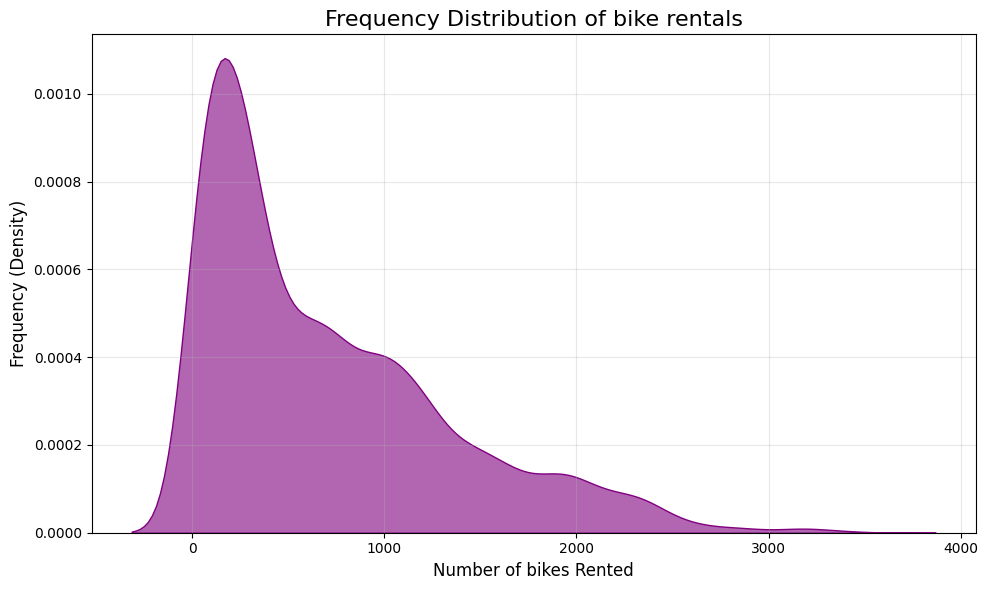

In [6]:
#Graph 1: Frequency Distribution Density for Bike rented count
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='Rented Bike Count', fill=True, color='purple', alpha=0.6)

plt.title('Frequency Distribution of bike rentals', fontsize=16)
plt.xlabel('Number of bikes Rented', fontsize=12)
plt.ylabel('Frequency (Density)', fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

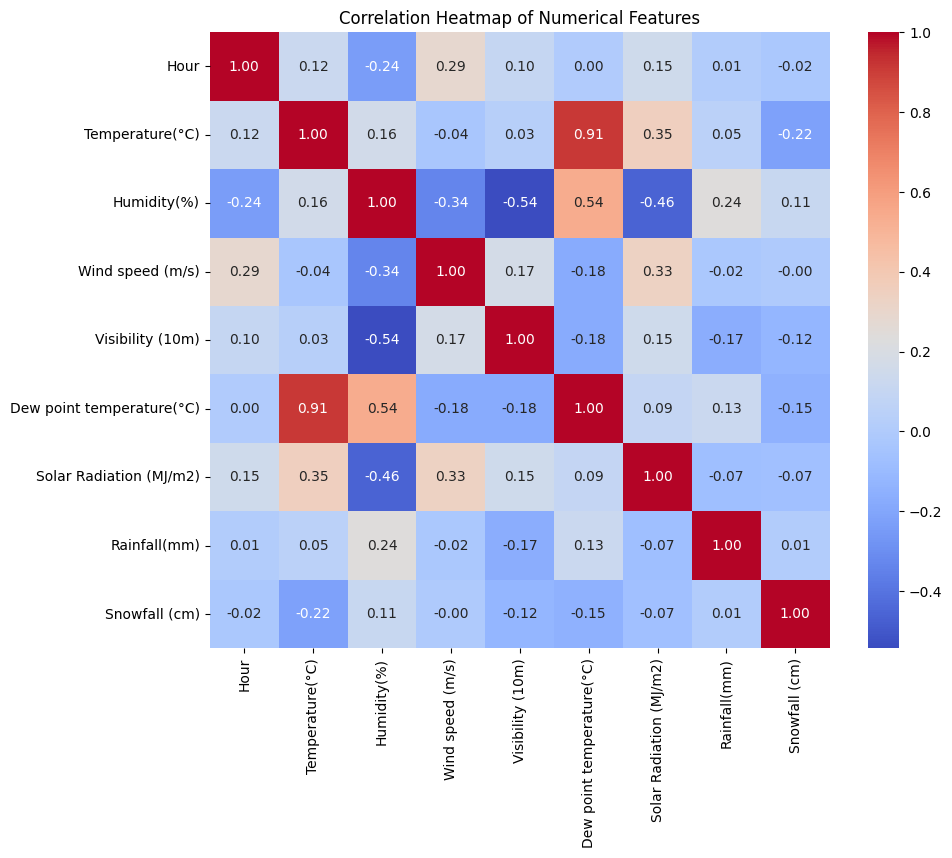

In [7]:
#Graph 2 - Feature Correlation Heatmap

numerical_columns = [
    'Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 
    'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)'
]

correlation_matrix = df[numerical_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()



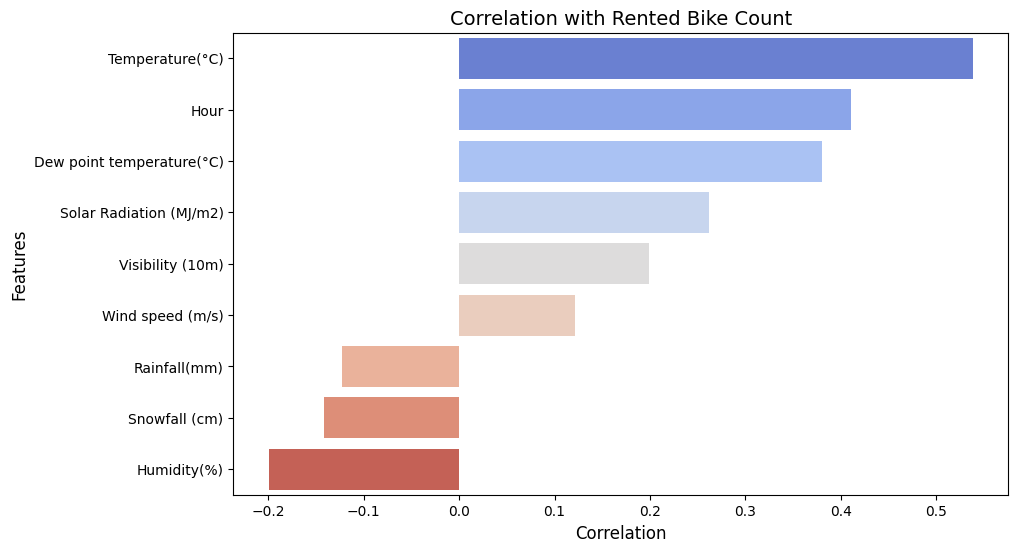

In [9]:
#Graph 3 - Correlation values between features and number of rented bikes (target)

target_corr = df.corr()['Rented Bike Count'].drop('Rented Bike Count')
target_corr_sorted = target_corr.sort_values(ascending=False)
colors = sns.color_palette("coolwarm", len(target_corr_sorted))

plt.figure(figsize=(10, 6))
sns.barplot( x=target_corr_sorted.values, y=target_corr_sorted.index, hue = target_corr_sorted.index, 
legend = False, palette=colors)

plt.title('Correlation with Rented Bike Count', fontsize=14)
plt.xlabel('Correlation', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.show()

/tmp/ipykernel_3089/2816425965.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=seasonal_data.index, y=seasonal_data.values, palette='coolwarm')


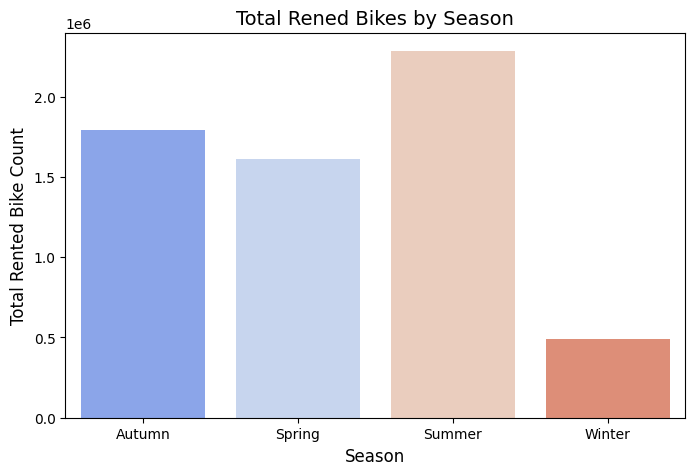

In [10]:
#Graph 4: Total Number of Bikes rented by season

seasonal_data = df.groupby('Seasons')['Rented Bike Count'].sum()
plt.figure(figsize=(8, 5))
sns.barplot(x=seasonal_data.index, y=seasonal_data.values, palette='coolwarm')
plt.title('Total Rened Bikes by Season', fontsize=14)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Total Rented Bike Count', fontsize=12)
plt.show()



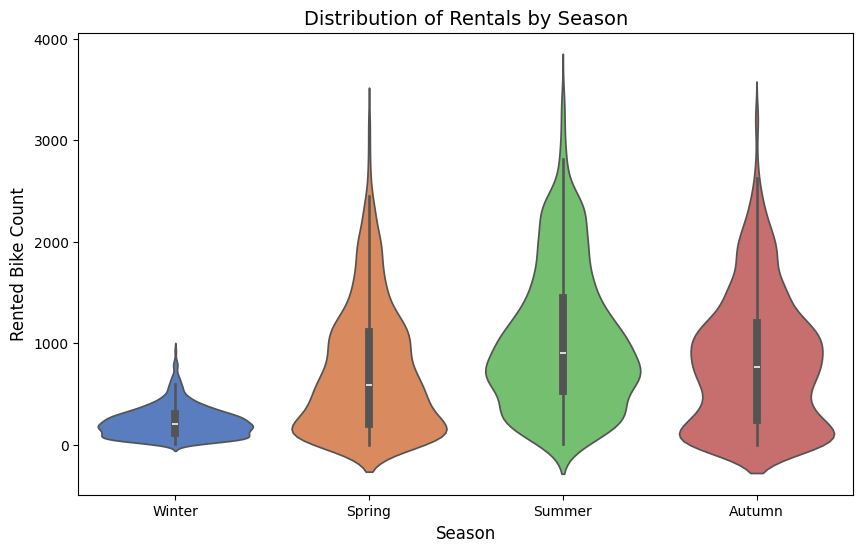

In [16]:
# Graph 5: Violin Plot for actual distribution of bikes rented
plt.figure(figsize=(10, 6))
sns.violinplot(x='Seasons', y='Rented Bike Count', data=df, palette='muted', hue='Seasons', legend=False, density_norm = 'area')
plt.title('Distribution of Rentals by Season', fontsize=14)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Rented Bike Count', fontsize=12)
plt.show()


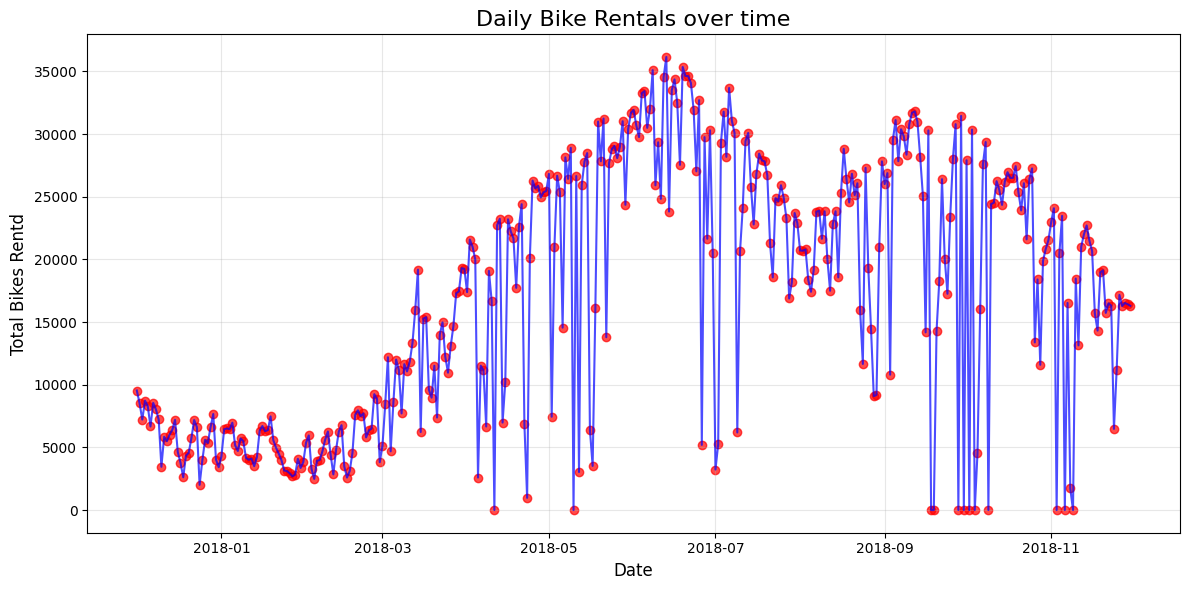

In [11]:
#Graph 6 - Sum of bikes rented daily over the year

df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
daily_rentals = df.groupby('Date')['Rented Bike Count'].sum().reset_index()


plt.figure(figsize=(12, 6))
plt.plot(daily_rentals['Date'], daily_rentals['Rented Bike Count'], color='blue', alpha=0.7, linewidth=1.5)
plt.scatter(daily_rentals['Date'], daily_rentals['Rented Bike Count'], color='red', alpha=0.7)


plt.title('Daily Bike Rentals over time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Bikes Rentd', fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()



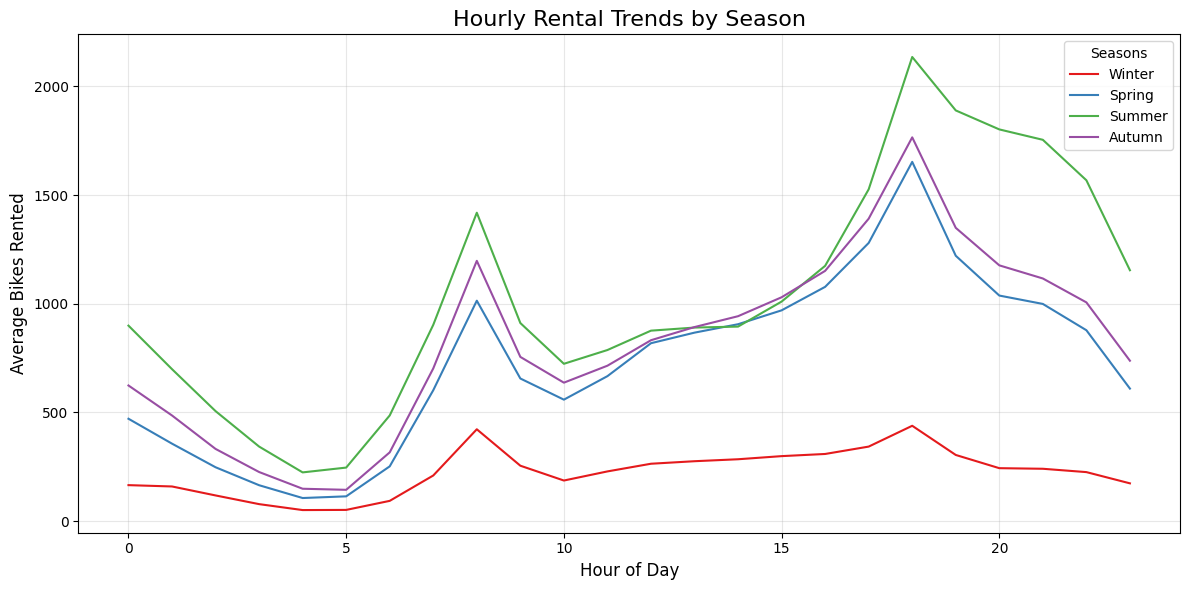

In [12]:
#Graph 7 - Average bike rentals by hour of day for different sseasons
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Hour', y='Rented Bike Count', hue='Seasons', errorbar=None, palette='Set1')
plt.title('Hourly Rental Trends by Season', fontsize=16)
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Average Bikes Rented', fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


/tmp/ipykernel_3336/1981166133.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Seasons', y=feature, data=df, palette='Set2')


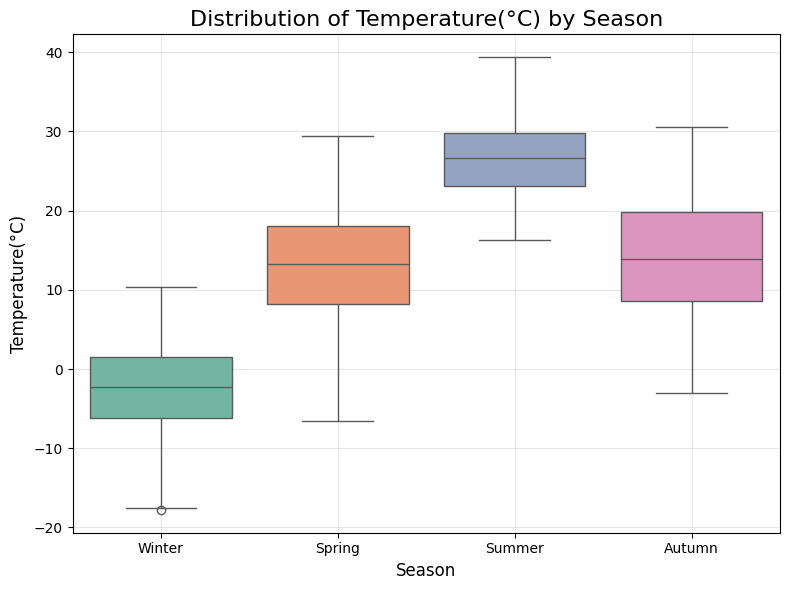

/tmp/ipykernel_3336/1981166133.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Seasons', y=feature, data=df, palette='Set2')


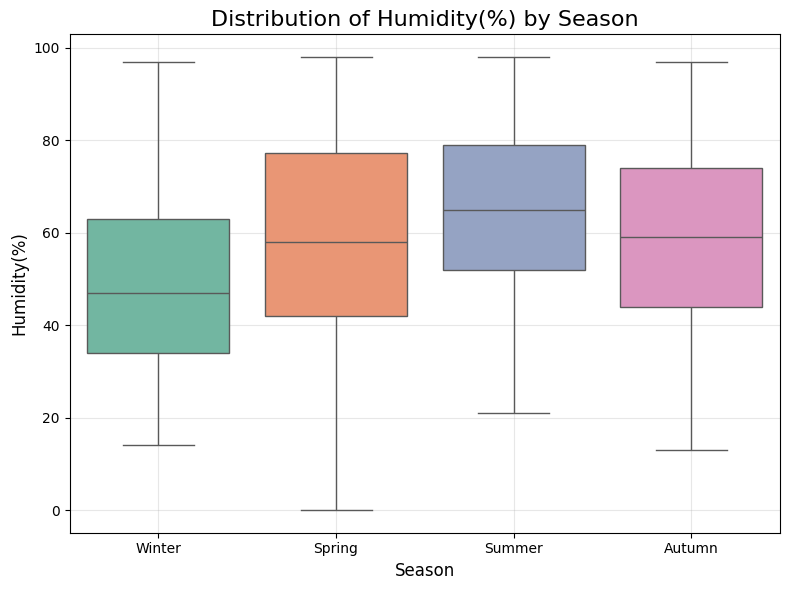

/tmp/ipykernel_3336/1981166133.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Seasons', y=feature, data=df, palette='Set2')


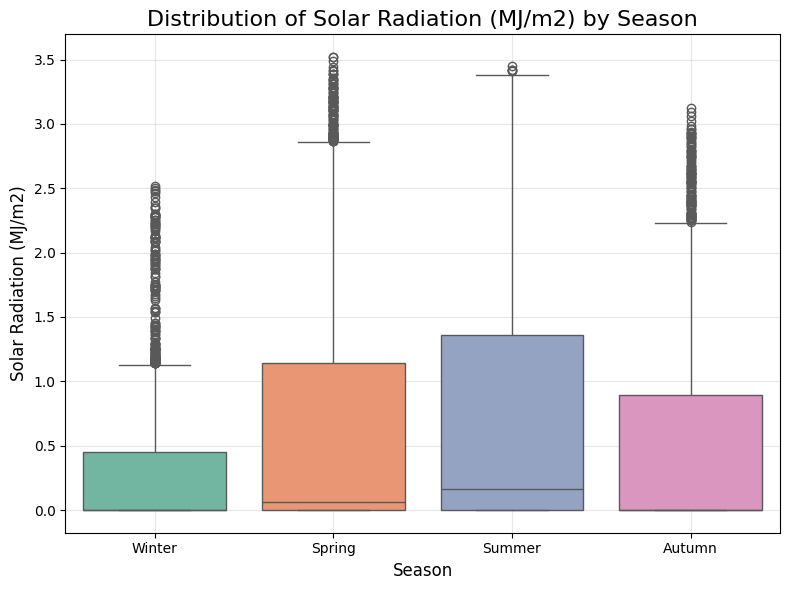

/tmp/ipykernel_3336/1981166133.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Seasons', y=feature, data=df, palette='Set2')


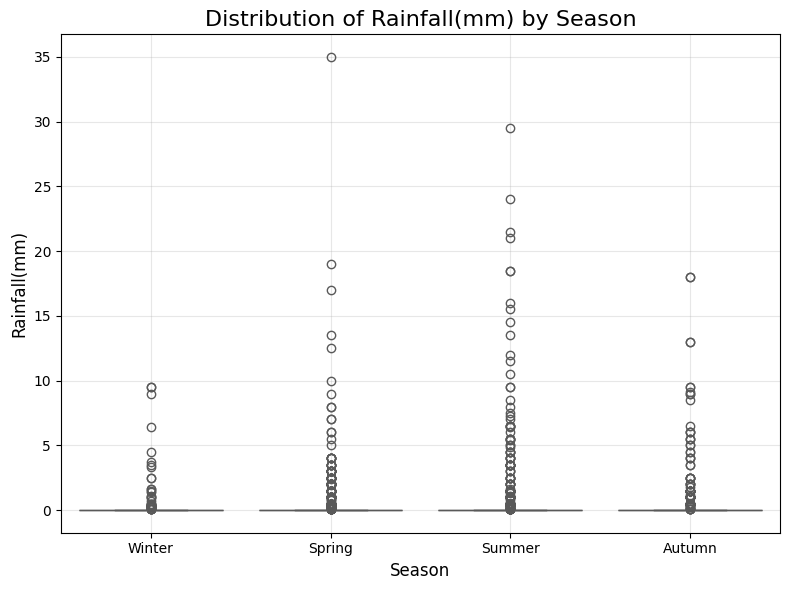

In [13]:
#Graphs 8-11 - Box plots for distribution of values of different environment factors by seasons

env_features = [
    'Temperature(°C)', 'Humidity(%)',
    'Solar Radiation (MJ/m2)', 'Rainfall(mm)'
]

for feature in env_features:
    plt.figure(figsize=(8, 6))  # Adjust size for individual plots
    sns.boxplot(x='Seasons', y=feature, data=df, palette='Set2')
    plt.title(f'Distribution of {feature} by Season', fontsize=16)
    plt.xlabel('Season', fontsize=12)
    plt.ylabel(feature, fontsize=12)
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()


The code below is used to verify if there are actually any bikes rented during any of the hours when functionign day is 0 to show redundancy. 

In [17]:
#chcecking rented bike values for functioning day 
func_no = df[df['Functioning Day'] == 'No']
func_no['Rented Bike Count'].value_counts()


0    295
Name: Rented Bike Count, dtype: int64

The section below performs data cleaning 
- Check missing values and duplicates again
- remove the functioning day column and assocaited "no" rows. 
- Removing date feature from dataset. 


In [18]:
#Data Cleaning Part B Q3 

#Checking Missing values and duplicate again 

missing_values = df.isnull().sum()
total_missing = missing_values.sum()
print(f"Total missing values: {total_missing}")

duplicates = df.duplicated()
print(f"Number of duplicate rows: {duplicates.sum()}")
2
#Removing roes where functioning day = No, and then removing that column
df = df[df['Functioning Day'] != 'No']
df = df.drop(columns=['Functioning Day'])

#Removing the feature Date from our dataset
df = df.drop(columns=['Date'])

df.head()


Total missing values: 0
Number of duplicate rows: 0


,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday


The section below does datapreprocessing: 
- engineers 2 features from hour information 
- One hot encodes the seasons feature
- Encodes holiday column into a binary column

In [19]:
#Data Pre-Processing Part B Q3 


#Feature Engineering Hour_sin and Hour_cos to represent cyclical nature of hours

df['Hour_sin'] = np.sin(2*np.pi*(df['Hour']/24))
df['Hour_cos'] = np.cos(2*np.pi*(df['Hour']/24))

#Removing hour column
df = df.drop(columns = ['Hour'])

#Numerical Encoding of Seasons and Holidays (One-Hot Encoding) 

#Encoding Seasons
df = pd.get_dummies(df, columns=['Seasons'], prefix='season')

#Encoding holiday - no holday holiday (Binary encoding)

df['Holiday'] = df['Holiday'].map({'No Holiday': 1, 'Holiday': 0})



This code below outputs post processed data for use in Azure Auto ML. 

In [24]:
#Outputting the unstandardized but encoded and cleaned data for use in Azure ML
#df.to_csv('SeoulBikeDataAutoML.csv', index=False)

The code below uses StandardScaler from Sklearn and standardizes continuous features. categorical encoding was not standardized.

In [20]:
#Standardization of continuous features only - not target values or one hot encoded features

scaler = StandardScaler()
df.iloc[:, [1,2,3,4,5,6,7,8,10,11]] = scaler.fit_transform(df.iloc[:, [1,2,3,4,5,6,7,8,10,11]])

df.head()

,Rented Bike Count,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Hour_sin,Hour_cos,season_Autumn,season_Spring,season_Summer,season_Winter
0,254,-1.484762,-1.032395,0.458429,0.929577,-1.627067,-0.654079,-0.132495,-0.174951,1,0.000718,1.414932,0,0,0,1
1,204,-1.509548,-0.983575,-0.895248,0.929577,-1.627067,-0.654079,-0.132495,-0.174951,1,0.366744,1.366744,0,0,0,1
2,173,-1.550858,-0.934756,-0.701865,0.929577,-1.634619,-0.654079,-0.132495,-0.174951,1,0.707825,1.225463,0,0,0,1
3,107,-1.567382,-0.885937,-0.798556,0.929577,-1.627067,-0.654079,-0.132495,-0.174951,1,1.000718,1.000718,0,0,0,1
4,78,-1.550858,-1.081214,0.555121,0.929577,-1.702586,-0.654079,-0.132495,-0.174951,1,1.225463,0.707825,0,0,0,1


The code block splits data into training (75%) and validation sets (25%)

In [21]:
#Splitting Data into train and test
X = df.iloc[:, 1:]
y = df.iloc[:,0]

X_train, X_val, y_train, y_val = train_test_split(X,y,test_size = 0.25, random_state = 0)


The code below performs a linear regression training model with default parameters. 
Then it tests on validation set and outputs performance measures (MAE, MSE and R^2) for these datasets. 

In [23]:
#Linear regression model fit and error calcualtion
model_1 = LinearRegression()
model_1.fit(X_train, y_train)
y_pred_lr = model_1.predict(X_val)

rmse_lr = root_mean_squared_error(y_val, y_pred_lr)
mae_lr = mean_absolute_error(y_val, y_pred_lr)
r2_lr = r2_score(y_val, y_pred_lr)

print(f"R-squared (R²): {r2_lr:.2f}")
print(f"RMSE: {rmse_lr:.2f}")
print(f"MAE: {mae_lr:.2f}")

R-squared (R²): 0.53
RMSE: 436.29
MAE: 324.45


The code below performs a Random Forest regressor training model with default parameters. 
Then it tests on validation set and outputs performance measures (MAE, MSE and R^2) for these datasets. 

In [24]:
#Random forest fit and error calculation
model_2 = RandomForestRegressor()
model_2.fit(X_train, y_train)
y_pred_rf = model_2.predict(X_val)

rmse_rf = root_mean_squared_error(y_val, y_pred_rf)
mae_rf = mean_absolute_error(y_val, y_pred_rf)
r2_rf = r2_score(y_val, y_pred_rf)

print(f"R-squared (R²): {r2_rf:.2f}")
print(f"RMSE: {rmse_rf:.2f}")
print(f"MAE: {mae_rf:.2f}")

R-squared (R²): 0.84
RMSE: 254.02
MAE: 153.01


The graphs and code below output the feature importances both the linear regression models and random forest models to see which factors are most important in predicting the demand for bikes.

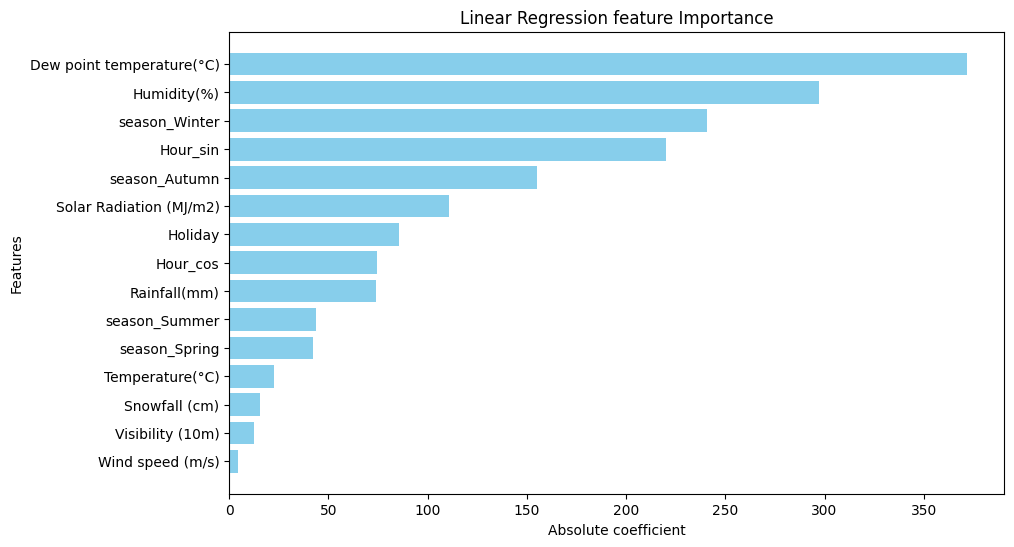

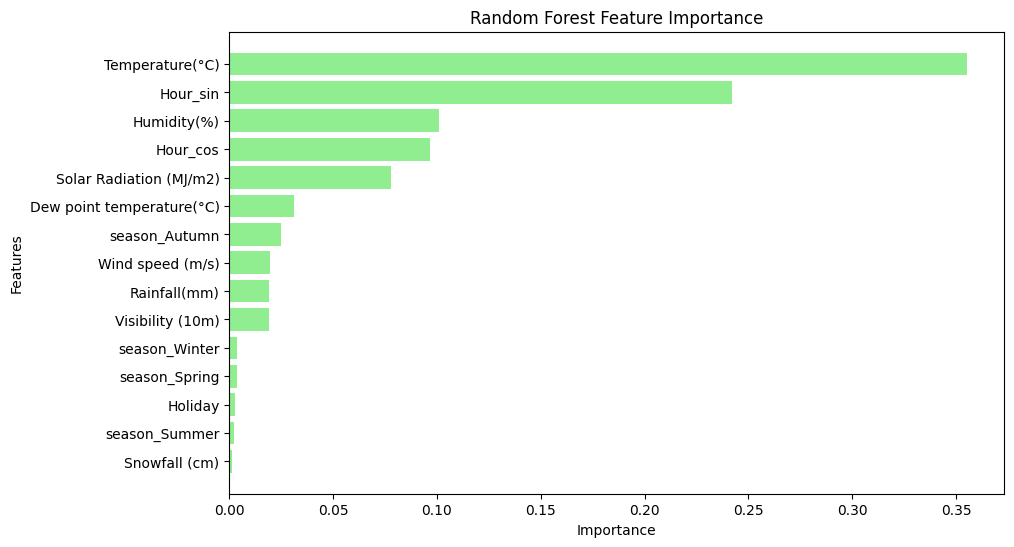

In [31]:
#Feature Importances: 
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Linear Regression Coefficient': abs(model_1.coef_),
    'Random Forest Importance': model_2.feature_importances_
})

linear_sorted = feature_importance.sort_values(by='Linear Regression Coefficient', ascending=False)
rf_sorted = feature_importance.sort_values(by='Random Forest Importance', ascending=False)

#Plotting Feature Importance (absolute coefficients) for linear model. 
plt.figure(figsize=(10, 6))
plt.barh(linear_sorted['Feature'], linear_sorted['Linear Regression Coefficient'], color='skyblue')
plt.xlabel('Absolute coefficient')
plt.ylabel('Features')
plt.title('Linear Regression feature Importance')
plt.gca().invert_yaxis() 
plt.show()

#Plotting Feature Importance (absolute coefficients) for Random forest model. 
plt.figure(figsize=(10, 6))
plt.barh(rf_sorted['Feature'], rf_sorted['Random Forest Importance'], color='lightgreen')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Random Forest Feature Importance')
plt.gca().invert_yaxis()  
plt.show()